# A simple ANN example with pytorch

## Problem description 
We want to define a simple 2-layer ANN for a regression problem:
- The problem is to get two real values as inputs and subtract one from the other as the output.
- We define a simple ANN with 2 input nodes, 8 hidden nodes in a hidden layer, and 1 output node

In [2]:
%pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/fa/47/1a7daf04f40715fc1cdc6f1cc3200228a556d06c843e6ceb58883b745e1b/torch-2.1.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     ----------------------------------- -- 122.9/133.1 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aa

In [3]:
# import libraries
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch
from torch.optim import SGD

import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Training set
x = [[7,5],[6,3],[5,2],[4,1],[10,5]]
y = [[2],[3],[3],[3],[5]]

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#X=torch.tensor(x).float().to(device)
#Y=torch.tensor(y).float().to(device)

X=torch.tensor(x).float()
Y=torch.tensor(y).float()

In [5]:
# to convert the dataset X,Y into a subclass of torch DataSet so we can easily use dataloader
class ModelDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return len(self.x)

In [6]:
ds = ModelDataset(X,Y)

# set the batch size here
dataloader = DataLoader(ds, batch_size=2, shuffle=True)

Here we define the ANN model. We can use Sequential to define the network one layer after the other. 
For every layer 

We use nn.Sequential to define our model as a sequence of layers. 
Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. 
The Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias (acts like $z(X)=\sum_i w_i x_i + b  $).
After a Linear Module, we might need to add the activation function, e.g., ReLU

In [7]:

# define the model with 2 input nodes, 8 hidden nodes (in one hidden layer), and 1 node in the output layer

model = nn.Sequential(nn.Linear(2,8), nn.ReLU(), nn.Linear(8,1))
#model = nn.Sequential(nn.Linear(2,8), nn.ReLU(), nn.Linear(8,1)).to(device)


# define the loss function (there are many loss predefined loss functions that we ca use)

loss = nn.MSELoss()

# define the optimization method (here mini-batch SGD), learning rate, to use for optimizing the learnable 
# model parameters (wieghts and biases)

opt = SGD(model.parameters(), lr=0.01)

# define a list to collect the loss values in every GD step (we will plot it later)
loss_history = []

# specify the number of epochs
num_epochs = 1000
for _ in range(num_epochs):
    for data in dataloader:
        x,y = data
        
        opt.zero_grad()  # to flush out the previous gradients
        
        # Forward pass: compute predicted y by passing x to the model. When
        # doing so you pass a Tensor of input data to the Module and it produces
        # a Tensor of output data.
        outputs = model(x)
        
        # Compute and print loss. We pass Tensors containing the predicted and true
        # values of y, and the loss function returns a Tensor containing the loss
        loss_value = loss(outputs,y)
        
        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss_value.backward() 
        
        # Update the weights using gradient descent.
        opt.step() 
        
        #  record the history of the loss values
        loss_history.append(loss_value.detach()) # .detach() detaches the pytorch tensor from the gradient 


In [8]:
# Print the model structure
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.5074, -0.3781],
        [-0.4491,  0.3097],
        [ 0.2443, -0.1162],
        [-0.2303,  0.0727],
        [ 0.7707, -0.8663],
        [-0.4536,  0.7542],
        [-0.0279, -0.6782],
        [ 0.0229,  0.1657]])), ('0.bias', tensor([-0.2110,  0.4497, -0.0131,  0.3132, -0.2251, -0.4520, -0.4894, -0.1649])), ('2.weight', tensor([[ 0.5284,  0.0673,  0.2221, -0.3455,  0.8509, -0.4863,  0.2970,  0.0105]])), ('2.bias', tensor([0.3632]))])


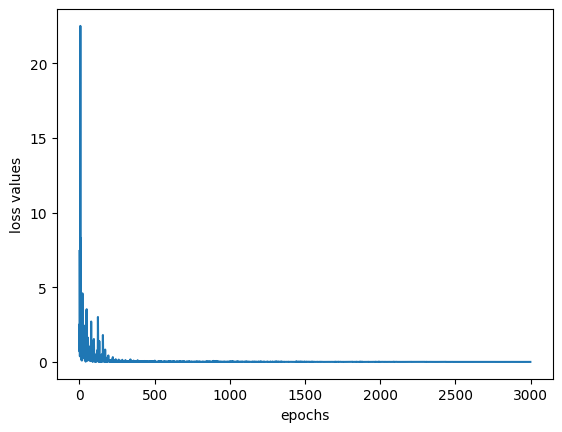

In [9]:
# Plot the history of loss during training
plt.plot(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.show()


In [10]:
# Use the model for prediction
test_vals = [[10,2], [4,1],[5,3]]

#test_vals = torch.tensor(test_vals).float().to(device)
test_vals = torch.tensor(test_vals).float()

print(model(test_vals).detach().numpy())

[[7.9171653]
 [3.007976 ]
 [2.0643399]]
